# Introduction to Numerical Computing with NumPy, SciPy 2019
https://www.youtube.com/watch?v=ZB7BZMhfPgk

In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3, 4,])

In [3]:
type(a)

numpy.ndarray

In [4]:
a.dtype

dtype('int32')

In [5]:
a[0]

1

In [6]:
a[0] = 10
a

array([10,  2,  3,  4])

In [7]:
a[0] = 11.5 
a #truncates because of data type mismatch

array([11,  2,  3,  4])

In [8]:
a.ndim # 1 dimensional

1

In [9]:
a.shape

(4,)

In [10]:
a.size # number of elemnets in the array

4

In [11]:
# element wise operations
print(a + a) 
print(a*a)
print(a*10)

[22  4  6  8]
[121   4   9  16]
[110  20  30  40]


In [12]:
# Universal functions (ufuncs)

np.sin(a)

array([-0.99999021,  0.90929743,  0.14112001, -0.7568025 ])

### Indexing and slicing

In [13]:
a

array([11,  2,  3,  4])

In [14]:
a[1:3]

array([2, 3])

In [15]:
a[-1:]

array([4])

In [16]:
a[1:-1] # throw away the first and last elements

array([2, 3])

In [17]:
a[:3] # get the first 3 elements

array([11,  2,  3])

In [18]:
a[-2:] # get the last two elements

array([3, 4])

In [19]:
a[::2] # every other element

array([11,  3])

In [20]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [21]:
a[4, :]

array([20, 21, 22, 23, 24])

In [22]:
a[:, 1::2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [23]:
a[1::2, :-1:2]

array([[ 5,  7],
       [15, 17]])

## Filter image exercise

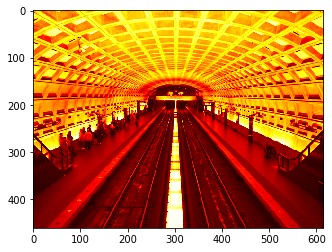

In [24]:
import matplotlib.pyplot as plt

img = plt.imread('Numpy-Tutorial-SciPyConf-2019-master/exercises/filter_image/dc_metro.png')

plt.imshow(img, cmap=plt.cm.hot)
plt.show()

In [25]:
top = img[0:-2, 1:-1]
left = img[1:-1, :-2]
right = img[1:-1, 2:]
bottom = img[2:, 1:-1]
centre = img[1:-1, 1:-1]

In [26]:
blurred = (top + left + right + bottom + centre) / 5

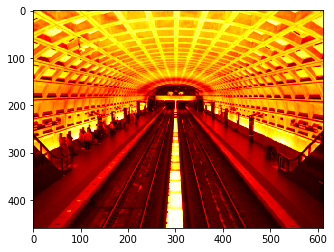

In [27]:
plt.figure()
plt.imshow(blurred, cmap=plt.cm.hot)
plt.show()

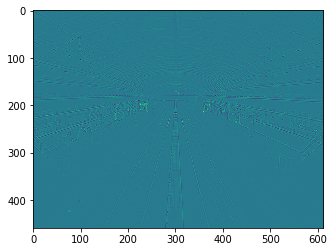

In [28]:
diff = img[1:-1,1:-1] - blurred
plt.figure()
plt.imshow(diff, )
plt.show()

### Fancy indexing

In [29]:
a = np.array([-1, -3, 1, 4, -6, 9, 3])

In [30]:
negative = a < 0

In [31]:
a[negative]

array([-1, -3, -6])

In [32]:
a[negative] = 0
a

array([0, 0, 1, 4, 0, 9, 3])

In [33]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [34]:
a[[0, 2, 3, 3],[2, 3, 1, 4]]

array([ 2, 13, 16, 19])

In [35]:
div_by_3 = (a % 3 == 0) 

In [36]:
a[div_by_3]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

Timestamp 1:19:00

### Computation with arrays  

Rules:
* Operations check for proper shape match
* Mathematical operators apply element-wise
* Reduction operations (mean, etc.) apply to the whole array, unless an axis is specified
* Missing values propagate unless otherwise specified

In [38]:
a = np.ones((5,6))
a

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [39]:
# Trick: axis specifies the index of the shape tuple which goes away

a.sum(axis=0)

array([5., 5., 5., 5., 5., 5.])

In [40]:
a.sum(axis=0).shape

(6,)

In [41]:
a = np.array([-1, 2, 5, 5])

In [42]:
a == a.max()

array([False, False,  True,  True])

In [43]:
np.where(a == a.max())

(array([2, 3], dtype=int64),)

In [45]:
np.where(a > 0)

(array([1, 2, 3], dtype=int64),)

#### Wind data exercise

In [47]:
from numpy import loadtxt

data = loadtxt('Numpy-Tutorial-SciPyConf-2019-master/exercises/wind_statistics/wind.data')

In [48]:
data
# year, month, day, [12 columns of wind speed data, each column corresponding to a different location]

array([[61.  ,  1.  ,  1.  , ..., 12.58, 18.5 , 15.04],
       [61.  ,  1.  ,  2.  , ...,  9.67, 17.54, 13.83],
       [61.  ,  1.  ,  3.  , ...,  7.67, 12.75, 12.71],
       ...,
       [78.  , 12.  , 29.  , ..., 16.42, 18.88, 29.58],
       [78.  , 12.  , 30.  , ..., 12.12, 14.67, 28.79],
       [78.  , 12.  , 31.  , ..., 11.38, 12.08, 22.08]])

In [49]:
data.shape

(6574, 15)

Finding min, max, mean and std over all speeds and all times

In [59]:
# Min windspeed

data_speeds = data[:, 3:].copy()
data_speeds.min()

0.0

In [60]:
# Max windspeed

data_speeds.max()

42.54

In [61]:
# Mean windspeed

data_speeds.mean()

10.22837377040868

In [62]:
# Standard deviation

data_speeds.std()

5.603840181095793

Finding the min, max, mean and std at each location

In [66]:
data_speeds.min(axis=0)

array([0.67, 0.21, 1.5 , 0.  , 0.13, 0.  , 0.  , 0.  , 0.  , 0.04, 0.13,
       0.67])

In [67]:
data_speeds.max(axis=0)

array([35.8 , 33.37, 33.84, 28.46, 37.54, 26.16, 30.37, 31.08, 25.88,
       28.21, 42.38, 42.54])

In [68]:
data_speeds.mean(axis=0)

array([12.36371463, 10.64644813, 11.66010344,  6.30627472, 10.45688013,
        7.09225434,  9.7968345 ,  8.49442044,  8.49581838,  8.70726803,
       13.121007  , 15.59946152])

In [69]:
data_speeds.std(axis=0)

array([5.61918301, 5.26820081, 5.00738377, 3.60513309, 4.93536333,
       3.96838126, 4.97689374, 4.49865783, 4.16746101, 4.50327222,
       5.83459319, 6.69734719])

" " " " for each day

In [73]:
print(data_speeds.min(axis=1), data_speeds.min(axis=1).shape) 

[9.29 6.5  6.17 ... 8.71 9.13 9.59] (6574,)


In [74]:
data_speeds.max(axis=1)

array([18.5 , 17.54, 18.5 , ..., 29.58, 28.79, 27.29])

In [76]:
data_speeds.mean(axis=1)

array([13.09666667, 11.79833333, 11.34166667, ..., 14.89      ,
       15.3675    , 15.4025    ])

In [77]:
data_speeds.std(axis=1)

array([2.5773188 , 3.28972854, 3.50543348, ..., 5.51175108, 5.30456427,
       5.45971172])

location of greatest windspeed each day

In [78]:
data_speeds.argmax(axis=1)

array([10, 10,  0, ..., 11, 11,  2], dtype=int64)

In [81]:
# To realign with original data
data_speeds.argmax(axis=1) + 3

array([13, 13,  3, ..., 14, 14,  5], dtype=int64)

Year, month and day of greatest windspeed

In [86]:
np.where(data_speeds == data_speeds.max())

(array([2161], dtype=int64), array([11], dtype=int64))

In [87]:
data[2161] # Has the 42.54 measurment found previously
# date is 2/12/66

array([66.  , 12.  ,  2.  , 28.21, 27.37, 22.54, 20.62, 22.08, 16.13,
       28.16, 17.29, 22.5 , 23.16, 25.88, 42.54])

Find the average windspeed in January for each location

In [100]:
data[data[:, 1] == 1] # picking out all January's

array([[61.  ,  1.  ,  1.  , ..., 12.58, 18.5 , 15.04],
       [61.  ,  1.  ,  2.  , ...,  9.67, 17.54, 13.83],
       [61.  ,  1.  ,  3.  , ...,  7.67, 12.75, 12.71],
       ...,
       [78.  ,  1.  , 29.  , ..., 20.5 , 19.12, 38.2 ],
       [78.  ,  1.  , 30.  , ...,  4.46, 10.41, 12.83],
       [78.  ,  1.  , 31.  , ...,  6.38,  6.54, 17.37]])

In [102]:
data[data[:, 1] == 1][:,3:].mean(axis=0) # picking out just the speeds


array([14.86955197, 12.92166667, 13.29962366,  7.19949821, 11.67571685,
        8.05483871, 11.81935484,  9.5094086 ,  9.54320789, 10.05356631,
       14.55051971, 18.02876344])

Calculate the mean windspeed for each month 

In [112]:
# finding the mean of a single month occurance


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()